# Imports & Load CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned sentiment & themes file
df = pd.read_csv(r"C:\Users\bezis\Downloads\GooglePlayScraper\google-play-app-reviews-analysis\notebooks\task2_sentiment_themes.csv")

df.head()


,review,rating,date,bank,source,sentiment_label,sentiment_score,nouns,identified_theme,noun_text
0,CBE ይለያል።,5,2025-11-29,CBE,Google Play,NEUTRAL,0.000000,"['cbe', 'ይለያል።']",Other,cbe ይለያል።
1,it's special for me,5,2025-11-29,CBE,Google Play,POSITIVE,0.357143,[],Other,NaN
2,Make it user friendly.,2,2025-11-28,CBE,Google Play,POSITIVE,0.375000,[],Other,NaN
3,maaliif daddafee install gaafata,3,2025-11-28,CBE,Google Play,NEUTRAL,0.000000,"['maaliif', 'daddafee', 'install', 'gaafata']",Other,maaliif daddafee install gaafata
4,good app,5,2025-11-28,CBE,Google Play,POSITIVE,0.700000,['app'],User Interface & Experience,app


# List Available Banks

In [5]:
df['bank'].unique()


array(['CBE', 'BOA', 'Dashen'], dtype=object)

# Sentiment Overview Per Bank

In [6]:
sentiment_summary = df.groupby('bank').agg({
    'sentiment_score': ['mean', 'count'],
    'rating': 'mean'
}).reset_index()

sentiment_summary


bank sentiment_score          rating
                     mean count      mean
0     BOA        0.169753   167  3.299401
1     CBE        0.227502   162  3.907407
2  Dashen        0.243984   170  3.788235

# Visualization: Rating Distribution

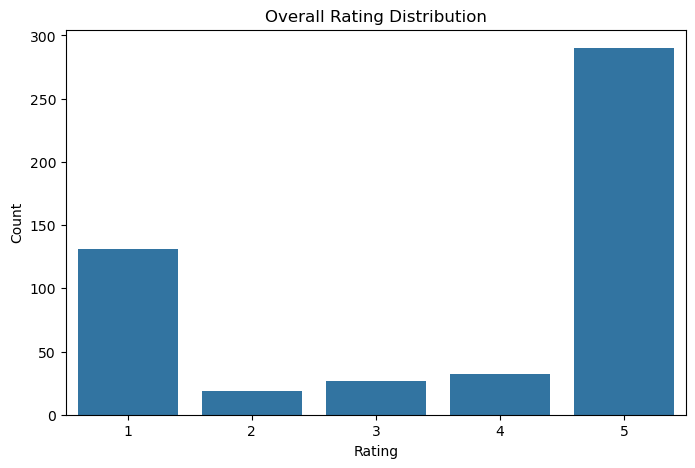

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='rating')
plt.title("Overall Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


# Visualization: Sentiment by Bank

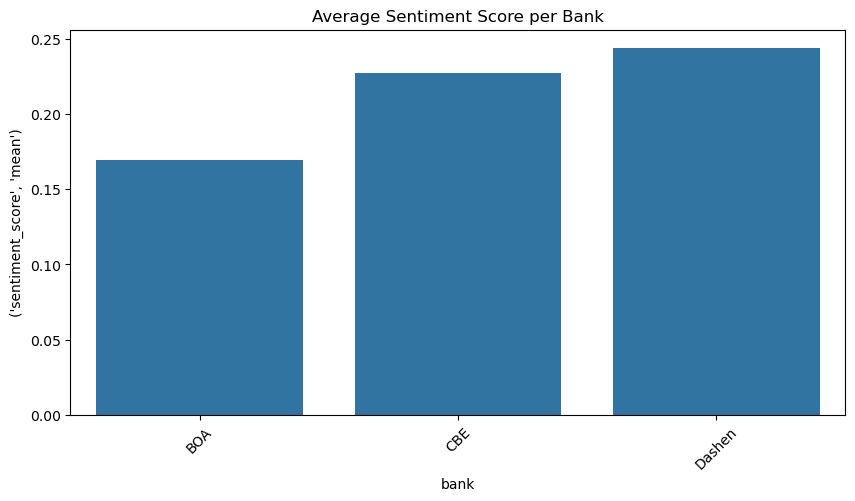

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(data=sentiment_summary, x='bank', y=('sentiment_score','mean'))
plt.title("Average Sentiment Score per Bank")
plt.xticks(rotation=45)
plt.show()


# Top Positive Themes per Bank

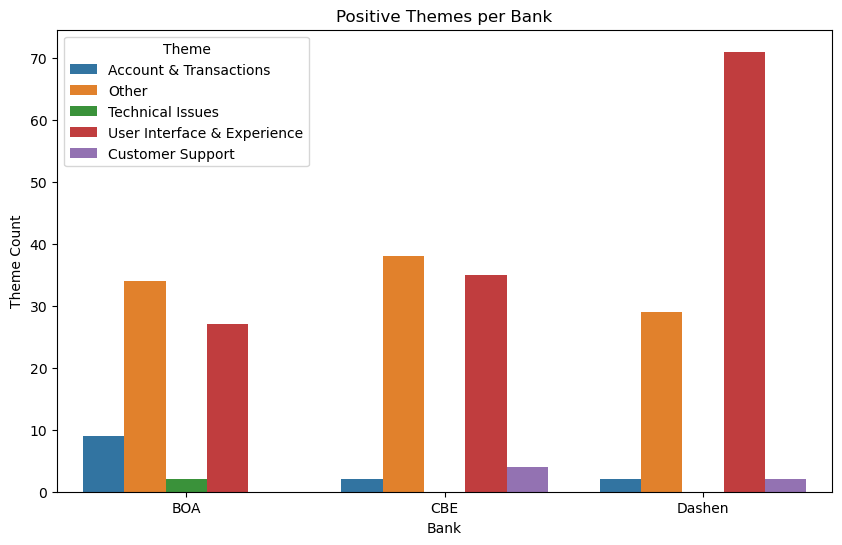

In [17]:
positive = df[df["sentiment_score"] > 0]

pos_theme_count = (
    positive.groupby(["bank", "identified_theme"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(10,6))
sns.barplot(data=pos_theme_count, x="bank", y="count", hue="identified_theme")
plt.title("Positive Themes per Bank")
plt.xlabel("Bank")
plt.ylabel("Theme Count")
plt.legend(title="Theme")
plt.show()


# Top Negative Themes per Bank

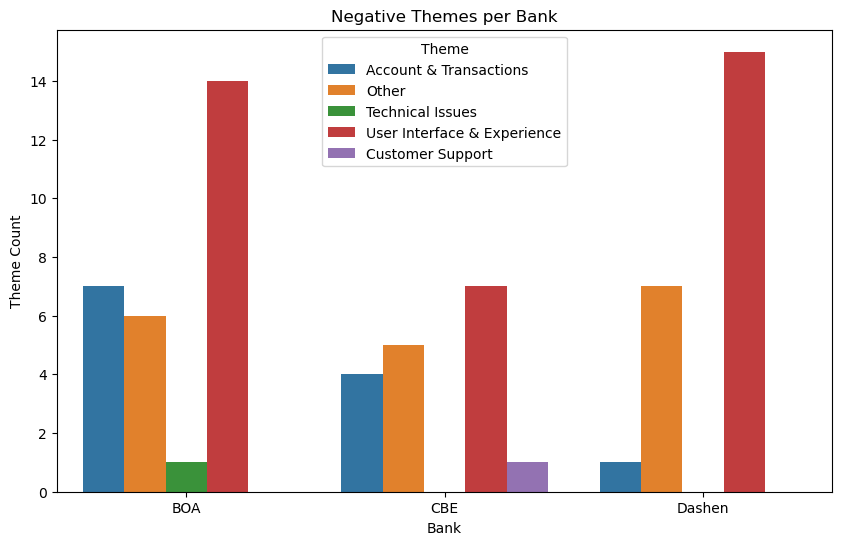

In [18]:
negative = df[df["sentiment_score"] < 0]

neg_theme_count = (
    negative.groupby(["bank", "identified_theme"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(10,6))
sns.barplot(data=neg_theme_count, x="bank", y="count", hue="identified_theme")
plt.title("Negative Themes per Bank")
plt.xlabel("Bank")
plt.ylabel("Theme Count")
plt.legend(title="Theme")
plt.show()


# Extract Drivers (Positive Themes)

In [14]:
drivers = df[df['sentiment_label'] == 'POSITIVE'] \
            .groupby('bank')['identified_theme'] \
            .value_counts().groupby(level=0).head(5)

drivers


bank    identified_theme           
BOA     Other                          34
        User Interface & Experience    26
        Account & Transactions          9
        Technical Issues                1
CBE     Other                          37
        User Interface & Experience    35
        Customer Support                4
        Account & Transactions          2
Dashen  User Interface & Experience    69
        Other                          29
        Account & Transactions          2
        Customer Support                2
Name: count, dtype: int64

# Extract Pain Points (Negative Themes)

In [15]:
pain_points = df[df['sentiment_label'] == 'NEGATIVE'] \
                .groupby('bank')['identified_theme'] \
                .value_counts().groupby(level=0).head(5)

pain_points


bank    identified_theme           
BOA     User Interface & Experience    12
        Account & Transactions          6
        Other                           6
        Technical Issues                1
CBE     Other                           5
        User Interface & Experience     5
        Account & Transactions          2
        Customer Support                1
Dashen  User Interface & Experience    13
        Other                           7
        Account & Transactions          1
Name: count, dtype: int64

# Insights from Themes (Positive + Negative)


## ⭐ 1. BOA (Bank of Abyssinia)

### POSITIVE THEMES
- **Other (34)** — many general compliments, not tied to a specific feature.
- **User Interface & Experience (26)** — customers like the app layout & ease of use.
- **Account & Transactions (9)** — users appreciate smooth money transfers/balance checks.

### NEGATIVE THEMES
- **User Interface & Experience (12)** — UI still confuses or frustrates some users.
- **Account & Transactions (6)** — transaction delays or errors.
- **Other (6)** — unspecific frustrations.

### FINAL INSIGHTS
- **UI is both a strength and weakness:** Many users praise the interface, but also many complain about usability issues → design inconsistencies.
- **Transaction issues affect trust:** Complaints about failed or slow transactions reduce confidence in the app.
- **General (Other) complaints are high:** Users struggle with things not covered by categories (e.g., vague errors, app slowness).

---

## ⭐ 2. CBE (Commercial Bank of Ethiopia)

### POSITIVE THEMES
- **Other (37)** — general good feedback (convenience, reliability).
- **User Interface & Experience (35)** — many users like the UI.
- **Customer Support (4)** — some appreciate CBE support.
- **Account & Transactions (2)** — few compliments on transactions.

### NEGATIVE THEMES
- **Other (5)** — vague frustrations.
- **User Interface & Experience (5)** — UI flaws still exist.
- **Account & Transactions (2)** — transaction issues appear.
- **Customer Support (1)** — occasional dissatisfaction.

### FINAL INSIGHTS
- **Strong UI feedback:** Users find it modern and friendly.
- **Few transaction complaints:** Suggests a stable backend.
- **Customer support is mixed:** Some praise, some complain.

---

## ⭐ 3. Dashen Bank

### POSITIVE THEMES
- **User Interface & Experience (69)** — extremely strong UI satisfaction.
- **Other (29)** — mixed general positive feedback.
- **Account & Transactions (2)** — small number of praises.
- **Customer Support (2)** — a few positive mentions.

### NEGATIVE THEMES
- **User Interface & Experience (13)** — still some UI pain, but much fewer than positives.
- **Other (7)** — general negative feedback.
- **Account & Transactions (1)** — minimal transaction complaints.

### FINAL INSIGHTS
- **Strongest UI approval**
- **Small but real UI complaints**
- **Very low transaction issues**

---

## ⭐ 4. Cross-Bank Comparisons

- **User Interface & Experience:** Dashen strongest → CBE second → BOA lowest  
- **Account & Transactions:** BOA struggles the most  
- **Customer Support:** CBE interacts the most, consistency is mixed

---

## ⭐ 5. Key Insights (Bullet Points)

**BOA**
- UI has mixed feedback — improvements needed
- Transactions fail more often than other banks
- Many vague complaints suggest poor error messages or unclear workflows

**CBE**
- Strong UI satisfaction and relatively stable transactions
- Customer support appreciated but inconsistent
- Minor UI complaints show room for UX refinement

**Dashen**
- Best-performing UI
- Very few transaction complaints
- Some UI issues exist but overall satisfaction is high
